In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-51.56377814342515 -108.01035242388976
74.52171769489934 82.11137053574708
-45.276410010632375 113.78207741521402
-18.237407840023238 18.046711739189476
-5.275661520316675 -175.11246858050734
45.90135242114491 171.2104552551461
-61.284983074712756 48.6706633480519
-29.944713612064966 133.2016629415549
-42.32827494535093 -48.237244923955984
-25.2313958966931 -121.19141128506678
79.0431706826773 -115.72408897208848
67.39606863410373 125.11279225697422
-31.038029439782633 146.77287621870363
0.5008107786894271 16.015969198108223
41.09787116515466 -78.05166315871968
-40.072172165079046 124.14552348409279
28.333951012218364 -9.278226745773395
8.288416580124675 -141.22531128891418
-34.934035562064174 -14.74946403747336
-58.774197767485596 -81.0823737160215
-34.89734288784276 104.80595230858853
-66.03923566552885 11.512107628134572
-19.881550823315692 118.79076877432601
-29.203809457410628 148.25007581033339
-42.60036454617463 75.73691611047647
-1.5635454839817555 100.61382132592439
42.8883611

-72.1126582627249 -123.53362894412592
11.882562937757967 -44.574998184883924
-20.630713084711218 155.78635313597943
44.86397072050377 145.8430155672503
-26.725587843835648 -127.4345184201504
-12.514669729258301 141.0316512545893
-35.624608837144066 -109.49147065423438
-3.6110033563884087 -43.37240925614287
-54.104891813729495 73.82957364246136
24.731448465263128 98.14253314556436
87.62219125752193 5.4533754728758765
-41.83866727128363 91.39491042138701
-32.07346957887743 -133.2277686799878
-8.290497465869933 4.941323334410413
70.283081885076 98.52562029507345
84.40856491441946 156.5697758568865
74.5627544528173 -109.42815834857731
27.101659205541694 109.07895287307855
15.054388295057265 147.76127743803283
-88.931215271995 -111.13878564563613
20.917225178025703 -37.655083613460704
23.80192783182018 -4.254840450811287
42.33097535465552 -159.37010262832226
7.642343927389788 -101.29220800981749
72.88166086410146 134.30754213701783
-58.71385826279524 -174.80618774093907
-32.14012215686603 -

-48.94328287298259 -96.2529376236195
51.24503639923384 -29.14384898372603
-88.32865126394327 9.174762434274271
65.09274779924542 -23.38978062532692
-49.01490336553749 -138.40531933401755
-53.42243819408338 -106.35300651729004
-49.74760417153233 79.15786961648467
-67.19322627360454 -90.25429251769549
-6.859311004552907 95.65406660481233
58.677129660599235 -40.70977388435307
-2.1046433124669477 -162.64788168280316
-63.01318001877841 -107.00524112002384
38.619948371190276 35.34308727531507
20.17171731404261 -104.58413530053112
-63.18025653913753 -143.23979187856946
55.94289724378814 -42.58112864303388
67.95121011405803 122.72296308709639
71.56465664882637 -122.92773953332738
38.34726579688103 59.01053294280294
-1.237812888305882 6.732070244420186
-65.44875230370552 24.05180826255662
-58.17703283964504 -140.8432916350953
15.764221006438248 -24.801639602315106
-53.17563278803963 27.265489670802822
-22.210342455808103 -54.87583536630359
62.726559649171406 157.39338835489218
-59.5704342952690

In [5]:
from citipy import citipy

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tsumeb
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | flinders
Processing Record 9 of Set 1 | rocha
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | zhigansk
Processing Record 13 of Set 1 | dubbo
Processing Record 14 of Set 1 | owando
Processing Record 15 of Set 1 | state college
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | tiznit
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | port hedland
Processing Record 24 of Set 1 | moree


Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | obala
Processing Record 43 of Set 4 | nurota
Processing Record 44 of Set 4 | krasnoarmeysk
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | millbrook
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 50 of Set 4 | vestmanna
Processing Record 1 of Set 5 | edd
Processing Record 2 of Set 5 | zorgo
Processing Record 3 of Set 5 | aksarka
Processing Record 4 of Set 5 | fatehpur
Processing Record 5 of Set 5 | along
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | satitoa
City not found. Skipping...
Processing Record 8 of Set 5 | grand-santi
Processing Record 9 of Set 5 | mananara
Processing Record 10 of Set 5 | ixtapa
Processing Record 11 of Set 5 | xuddur
Processing Record 12 of Set 5 | merauke
Processing Record 13 of Set 5 | campoverde
Processing Recor

Processing Record 29 of Set 8 | verkhnyaya inta
Processing Record 30 of Set 8 | otradnoye
Processing Record 31 of Set 8 | morehead
Processing Record 32 of Set 8 | chapadinha
Processing Record 33 of Set 8 | myitkyina
Processing Record 34 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | tongren
Processing Record 37 of Set 8 | tecoanapa
Processing Record 38 of Set 8 | minsk
Processing Record 39 of Set 8 | chuy
Processing Record 40 of Set 8 | emba
Processing Record 41 of Set 8 | dalby
Processing Record 42 of Set 8 | wajir
Processing Record 43 of Set 8 | yar-sale
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | xining
Processing Record 46 of Set 8 | shakhovskaya
Processing Record 47 of Set 8 | kabare
Processing Record 48 of Set 8 | plettenberg bay
Processing Record 49 of Set 8 | lima
Processing Record 50 of Set 8 | talnakh
Processing Record 1 of Set 9 | baglung
Processing Record 2 of Set 9 

Processing Record 22 of Set 12 | aykhal
Processing Record 23 of Set 12 | sanming
Processing Record 24 of Set 12 | el ejido
Processing Record 25 of Set 12 | yuzhou
Processing Record 26 of Set 12 | syedove
Processing Record 27 of Set 12 | christchurch
Processing Record 28 of Set 12 | skibotn
Processing Record 29 of Set 12 | tabou
Processing Record 30 of Set 12 | freeport
Processing Record 31 of Set 12 | srednekolymsk
Processing Record 32 of Set 12 | beloha
Processing Record 33 of Set 12 | muros
Processing Record 34 of Set 12 | merthyr tydfil
Processing Record 35 of Set 12 | delhi
Processing Record 36 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 37 of Set 12 | mitsamiouli
Processing Record 38 of Set 12 | mackay
Processing Record 39 of Set 12 | elko
Processing Record 40 of Set 12 | bondo
Processing Record 41 of Set 12 | bonfim
Processing Record 42 of Set 12 | atherton
Processing Record 43 of Set 12 | naze
Processing Record 44 of Set 12 | timra
Processing Record 45 of

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,74.59,51,13,14.94,BR,2022-07-16 19:09:25
1,Dikson,73.5069,80.5464,47.88,68,40,7.63,RU,2022-07-16 19:09:25
2,Albany,42.6001,-73.9662,85.42,49,100,3.00,US,2022-07-16 19:09:25
3,Tsumeb,-19.2333,17.7167,59.76,29,0,9.33,NA,2022-07-16 19:09:26
4,Nikolskoye,59.7035,30.7861,58.89,90,40,4.83,RU,2022-07-16 19:09:26
5,East London,-33.0153,27.9116,66.16,51,0,8.99,ZA,2022-07-16 19:09:04
6,Flinders,-34.5833,150.8552,53.26,55,0,9.53,AU,2022-07-16 19:09:27
7,Rocha,-34.4833,-54.3333,48.94,91,100,19.82,UY,2022-07-16 19:09:27
8,Rikitea,-23.1203,-134.9692,73.33,75,100,17.07,PF,2022-07-16 19:09:27
9,Yellowknife,62.4560,-114.3525,69.57,56,47,7.40,CA,2022-07-16 19:04:51


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2022-07-16 19:09:25,-24.7911,-50.0119,74.59,51,13,14.94
1,Dikson,RU,2022-07-16 19:09:25,73.5069,80.5464,47.88,68,40,7.63
2,Albany,US,2022-07-16 19:09:25,42.6001,-73.9662,85.42,49,100,3.00
3,Tsumeb,NA,2022-07-16 19:09:26,-19.2333,17.7167,59.76,29,0,9.33
4,Nikolskoye,RU,2022-07-16 19:09:26,59.7035,30.7861,58.89,90,40,4.83
...,...,...,...,...,...,...,...,...,...
564,Moyale,KE,2022-07-16 19:24:36,3.5167,39.0584,67.77,66,54,4.63
565,Sterling,US,2022-07-16 19:22:11,39.0062,-77.4286,87.42,70,75,6.91
566,Worland,US,2022-07-16 19:24:37,44.0169,-107.9554,92.55,32,0,6.91
567,Borda Da Mata,BR,2022-07-16 19:24:37,-22.2742,-46.1653,76.17,45,100,5.32


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

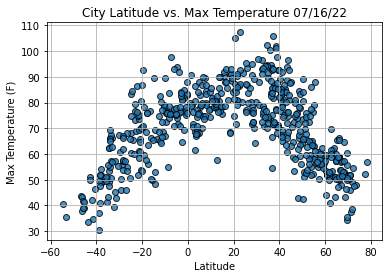

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

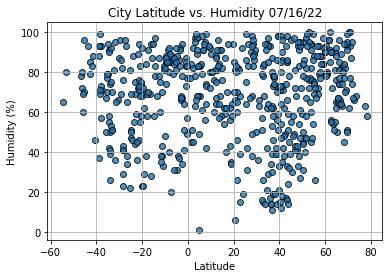

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

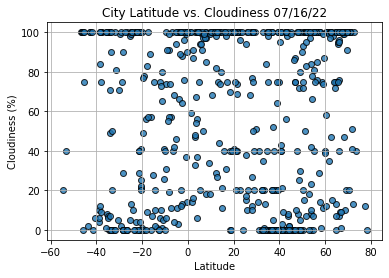

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

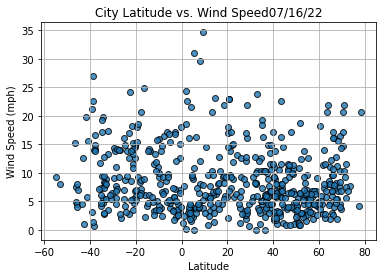

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                State College
Lat                       40.7934
Lng                        -77.86
Max Temp                    83.89
Humidity                       54
Cloudiness                     40
Wind Speed                   8.99
Country                        US
Date          2022-07-16 19:09:29
Name: 13, dtype: object

In [45]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
564     True
565     True
566     True
567    False
568     True
Name: Lat, Length: 569, dtype: bool

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Dikson,73.5069,80.5464,47.88,68,40,7.63,RU,2022-07-16 19:09:25
2,Albany,42.6001,-73.9662,85.42,49,100,3.00,US,2022-07-16 19:09:25
4,Nikolskoye,59.7035,30.7861,58.89,90,40,4.83,RU,2022-07-16 19:09:26
9,Yellowknife,62.4560,-114.3525,69.57,56,47,7.40,CA,2022-07-16 19:04:51
10,Zhigansk,66.7697,123.3711,47.98,82,100,16.06,RU,2022-07-16 19:09:28


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

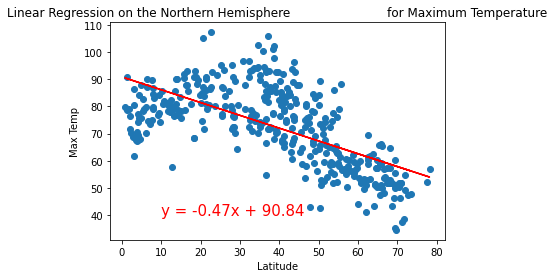

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

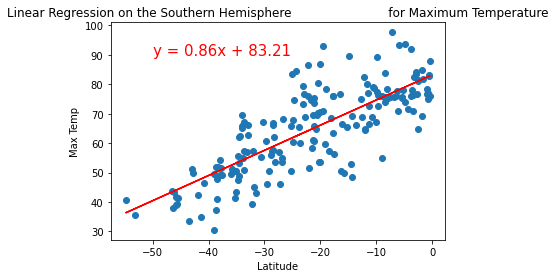

In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

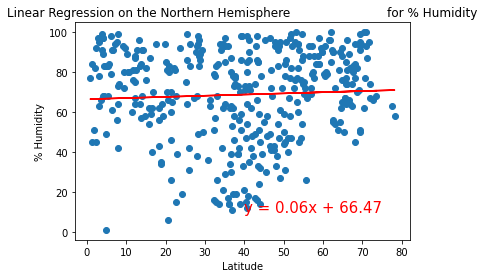

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


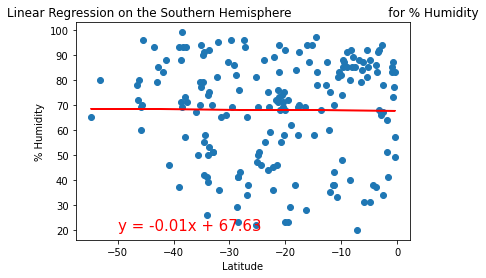

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

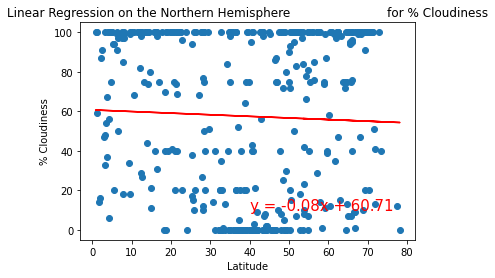

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))


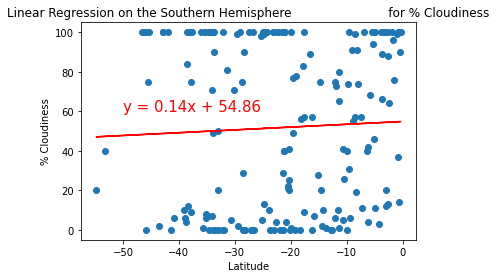

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

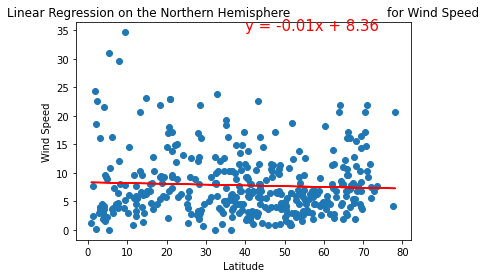

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


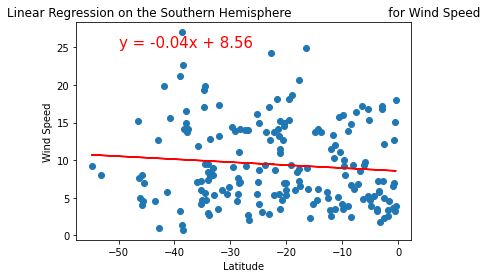

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))
